<a href="https://colab.research.google.com/github/Augusta02/Machine-Learning-Projects/blob/main/Implement_K_NN_on_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import files
uploaded= files.upload()

Saving iris.xlsx to iris (2).xlsx


In [7]:
import io
iris =pd.read_excel(io.BytesIO(uploaded["iris.xlsx"]))
iris.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
# understand statistics of dataset
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# understand information of dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# check for missing values
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

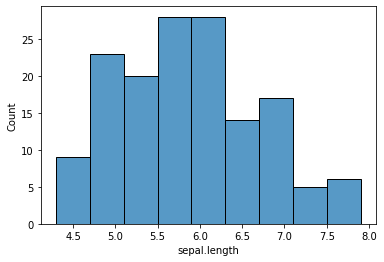

In [12]:
# histogram visualization
sns.histplot(data=iris, x="sepal.length")

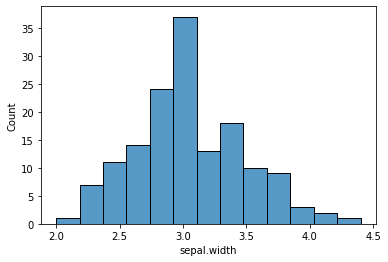

In [13]:
sns.histplot(data=iris, x="sepal.width")

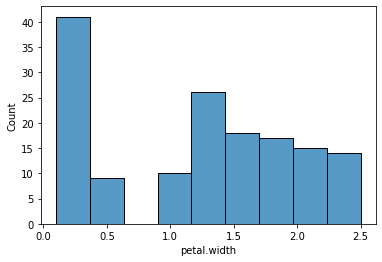

In [14]:
sns.histplot(data=iris, x="petal.width")

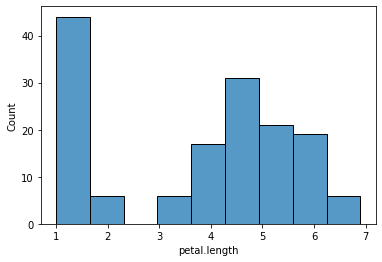

In [15]:
sns.histplot(data=iris, x="petal.length")

In [25]:
# check for correlation data
iris.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


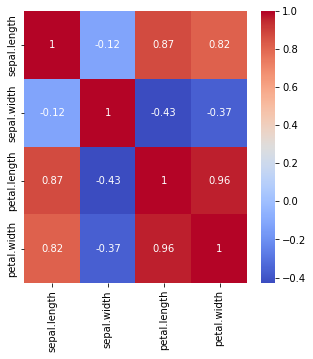

In [30]:
# use heatmap to visualize corr information
corr= iris.corr()
fig,ax= plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax,cmap="coolwarm")

In [31]:
# use labelencoder to change string values("variety") to numerical data to better inform the model
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

iris["variety"]= le.fit_transform(iris['variety'])
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
# Prepare data for modelling
from sklearn.model_selection import train_test_split
x= iris.drop(columns=["variety"])
y= iris['variety']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30)

In [34]:
# model used is KNN
from sklearn.neighbors import KNeighborsClassifier
iris_mo= KNeighborsClassifier()

In [35]:
# fit model into KNN
iris_mo.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
# find accuracy of the model
print("Accuracy: ", iris_mo.score(x_test,y_test)*100)

Accuracy:  93.33333333333333
